## SPRING 2021
## Applied Machine Learning
### Practicum 4: K-Nearest Neighbors. Solutions.

Download and pre-process the Iris flower data set by running the code cell below.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris_data=load_iris()
iris = pd.DataFrame(data=iris_data['data'], columns=[col[:-5] for col in iris_data['feature_names']])
iris['target']=iris_data['target']

In [2]:
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
cols=['sepal length', 'sepal width']

X=iris.loc[:, cols].values
y=iris.loc[:, 'target'].values

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)

In [6]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
y_pred=knn.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [9]:
accuracy_score(y_test, y_pred)

0.8

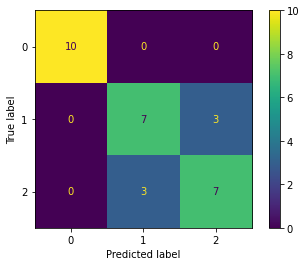

In [10]:
plot_confusion_matrix(knn, X_test, y_test)

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.70      0.70      0.70        10
           2       0.70      0.70      0.70        10

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



In [13]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='macro')

0.7999999999999999

In [ ]:
from sklearn.model_selection import cross_val_score

N=60
accuracy = []
neighbors = []

for k in range(1, N+1):
  neighbors.append(k)
  knn = KNeighborsClassifier(n_neighbors=k)
  acc = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')